![saham](https://ejaarti.tumblr.com/image/622161939412434944)

# Prediksi Harga Saham Tesla

Memprediksi harga saham Tesla menggunakan algoritma LSTM. Di notebook ini, saya menggunakan Tensorflow dengan backend Keras untuk membantu dalam pembuatan model. Harga saham historis menggunakan harga penutupan bursa dari bulan April hingga Mei

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib
import pandas as pd
from datetime import datetime

In [ ]:
def plot_series(time,series,format="-",start=0,end=None):
  plt.plot(time[start:end],series[start:end],format)
  plt.xlabel("Time")
  plt.ylabel("Value")
  plt.grid(True)

In [ ]:
df = pd.read_csv("/content/tsla.csv")

df

,Unnamed: 0,Date,Open,High,Low,Close*,Adj Close**,Volume
0,0,"Apr 29, 2020",790.17,803.20,783.16,800.51,800.51,15812100
1,1,"Apr 28, 2020",795.64,805.00,756.69,769.12,769.12,15222000
2,2,"Apr 27, 2020",737.61,799.49,735.00,798.75,798.75,20681400
3,3,"Apr 24, 2020",710.81,730.73,698.18,725.15,725.15,13237600
4,4,"Apr 23, 2020",727.60,734.00,703.13,705.63,705.63,13236700
...,...,...,...,...,...,...,...,...
248,248,"May 06, 2019",250.02,258.35,248.50,255.34,255.34,10833900
249,249,"May 03, 2019",243.86,256.61,243.49,255.03,255.03,23706800
250,250,"May 02, 2019",245.52,247.13,237.72,244.10,244.10,18159300
251,251,"May 01, 2019",238.85,240.00,231.50,234.01,234.01,10704400


In [ ]:
df.drop(labels="Unnamed: 0", axis=1, inplace=True)
df.rename(columns={"Close*":"Close", "Adj Close**":"Adj Close"}, inplace=True)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,"Apr 29, 2020",790.17,803.20,783.16,800.51,800.51,15812100
1,"Apr 28, 2020",795.64,805.00,756.69,769.12,769.12,15222000
2,"Apr 27, 2020",737.61,799.49,735.00,798.75,798.75,20681400
3,"Apr 24, 2020",710.81,730.73,698.18,725.15,725.15,13237600
4,"Apr 23, 2020",727.60,734.00,703.13,705.63,705.63,13236700
...,...,...,...,...,...,...,...
248,"May 06, 2019",250.02,258.35,248.50,255.34,255.34,10833900
249,"May 03, 2019",243.86,256.61,243.49,255.03,255.03,23706800
250,"May 02, 2019",245.52,247.13,237.72,244.10,244.10,18159300
251,"May 01, 2019",238.85,240.00,231.50,234.01,234.01,10704400


In [ ]:
df = pd.DataFrame(df.values[::-1],df.index,df.columns)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,"Apr 30, 2019",242.06,244.21,237,238.69,238.69,9464600
1,"May 01, 2019",238.85,240,231.5,234.01,234.01,10704400
2,"May 02, 2019",245.52,247.13,237.72,244.1,244.1,18159300
3,"May 03, 2019",243.86,256.61,243.49,255.03,255.03,23706800
4,"May 06, 2019",250.02,258.35,248.5,255.34,255.34,10833900
...,...,...,...,...,...,...,...
248,"Apr 23, 2020",727.6,734,703.13,705.63,705.63,13236700
249,"Apr 24, 2020",710.81,730.73,698.18,725.15,725.15,13237600
250,"Apr 27, 2020",737.61,799.49,735,798.75,798.75,20681400
251,"Apr 28, 2020",795.64,805,756.69,769.12,769.12,15222000


In [ ]:
adj_close = df["Adj Close"]
adj_close.index = df['Date']

adj_close.head()

Date
Apr 30, 2019    238.69
May 01, 2019    234.01
May 02, 2019     244.1
May 03, 2019    255.03
May 06, 2019    255.34
Name: Adj Close, dtype: object

In [ ]:
type(df['Date'][0])

str

In [ ]:
dates = df["Date"]
dates1 = []

for date in dates:
  dates1.append(datetime.strptime(date, "%b %d, %Y"))

dates=pd.core.series.Series(dates1)

type(dates[0])

pandas._libs.tslibs.timestamps.Timestamp

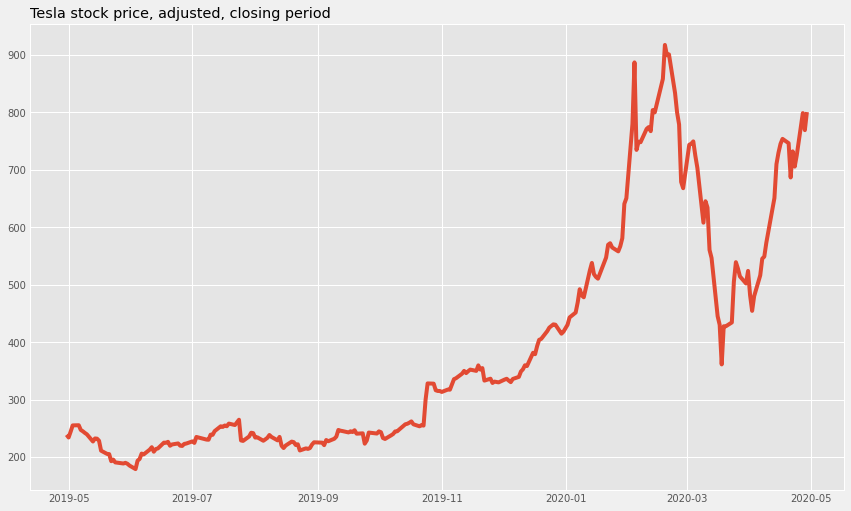

In [ ]:
plt.figure(figsize=(13,8))
plt.style.use('ggplot')
plt.plot(dates1,adj_close)
plt.title("Tesla stock price, adjusted, closing period", loc="left")
plt.rcParams.update({'font.size':14})

In [ ]:
series = np.array(adj_close.values)
time = np.array(dates)

In [ ]:
series = pd.to_numeric(series,errors='coerce',downcast='float')
series

array([238.69, 234.01, 244.1 , 255.03, 255.34, 247.06, 244.84, 241.98,
       239.52, 227.01, 232.31, 231.95, 228.33, 211.03, 205.36, 205.08,
       192.73, 195.49, 190.63, 188.7 , 189.86, 188.22, 185.16, 178.97,
       193.6 , 196.59, 205.95, 204.5 , 212.88, 217.1 , 209.26, 213.91,
       214.92, 225.03, 224.74, 226.43, 219.62, 221.86, 223.64, 219.76,
       219.27, 222.84, 223.46, 227.17, 224.55, 234.9 , 233.1 , 230.34,
       230.06, 238.92, 238.6 , 245.08, 253.5 , 252.38, 254.86, 253.54,
       258.18, 255.68, 260.17, 264.88, 228.82, 228.04, 235.77, 242.26,
       241.61, 233.85, 234.34, 228.32, 230.75, 233.42, 238.3 , 235.01,
       229.01, 235.  , 219.62, 215.64, 219.94, 226.83, 225.86, 220.83,
       222.15, 211.4 , 215.  , 214.08, 215.59, 221.71, 225.61, 225.01,
       220.68, 229.58, 227.45, 231.79, 235.54, 247.1 , 245.87, 245.2 ,
       242.81, 244.79, 243.49, 246.6 , 240.62, 241.23, 223.21, 228.7 ,
       242.56, 242.13, 240.87, 244.69, 243.13, 233.03, 231.43, 237.72,
      

In [ ]:
series.dtype

dtype('float32')

In [ ]:
series.shape

(253,)

In [ ]:
split_time = 210
adj_train = series[:split_time]
adj_valid = series[split_time:]
dates_train = dates[:split_time]
dates_valid = dates[split_time:]

window_size = 16
batch_size = 32
shuffle_buffer_size = 50

In [ ]:
adj_train = pd.to_numeric(adj_train,errors='coerce',downcast='float')
adj_train.astype(np.float)
adj_train

array([238.69, 234.01, 244.1 , 255.03, 255.34, 247.06, 244.84, 241.98,
       239.52, 227.01, 232.31, 231.95, 228.33, 211.03, 205.36, 205.08,
       192.73, 195.49, 190.63, 188.7 , 189.86, 188.22, 185.16, 178.97,
       193.6 , 196.59, 205.95, 204.5 , 212.88, 217.1 , 209.26, 213.91,
       214.92, 225.03, 224.74, 226.43, 219.62, 221.86, 223.64, 219.76,
       219.27, 222.84, 223.46, 227.17, 224.55, 234.9 , 233.1 , 230.34,
       230.06, 238.92, 238.6 , 245.08, 253.5 , 252.38, 254.86, 253.54,
       258.18, 255.68, 260.17, 264.88, 228.82, 228.04, 235.77, 242.26,
       241.61, 233.85, 234.34, 228.32, 230.75, 233.42, 238.3 , 235.01,
       229.01, 235.  , 219.62, 215.64, 219.94, 226.83, 225.86, 220.83,
       222.15, 211.4 , 215.  , 214.08, 215.59, 221.71, 225.61, 225.01,
       220.68, 229.58, 227.45, 231.79, 235.54, 247.1 , 245.87, 245.2 ,
       242.81, 244.79, 243.49, 246.6 , 240.62, 241.23, 223.21, 228.7 ,
       242.56, 242.13, 240.87, 244.69, 243.13, 233.03, 231.43, 237.72,
      

In [ ]:
series[...,np.newaxis]

array([[238.69],
       [234.01],
       [244.1 ],
       [255.03],
       [255.34],
       [247.06],
       [244.84],
       [241.98],
       [239.52],
       [227.01],
       [232.31],
       [231.95],
       [228.33],
       [211.03],
       [205.36],
       [205.08],
       [192.73],
       [195.49],
       [190.63],
       [188.7 ],
       [189.86],
       [188.22],
       [185.16],
       [178.97],
       [193.6 ],
       [196.59],
       [205.95],
       [204.5 ],
       [212.88],
       [217.1 ],
       [209.26],
       [213.91],
       [214.92],
       [225.03],
       [224.74],
       [226.43],
       [219.62],
       [221.86],
       [223.64],
       [219.76],
       [219.27],
       [222.84],
       [223.46],
       [227.17],
       [224.55],
       [234.9 ],
       [233.1 ],
       [230.34],
       [230.06],
       [238.92],
       [238.6 ],
       [245.08],
       [253.5 ],
       [252.38],
       [254.86],
       [253.54],
       [258.18],
       [255.68],
       [260.17

Function to form windowed dataset

In [ ]:
def windowed_dataset(series,window_size,batch_size,shuffle_buffer):
  series = tf.expand_dims(series,axis=-1)
  ds = tf.data.Dataset.from_tensor_slices(series)
  ds = ds.window(window_size + 1,shift=1, drop_remainder=True)
  ds = ds.flat_map(lambda w: w.batch(window_size + 1))
  ds = ds.shuffle(shuffle_buffer)
  ds = ds.map(lambda w: (w[:-1], w[1:]))
  return ds.batch(batch_size).prefetch(1)

Function for data forecasting

In [ ]:
def model_forecast(model,series,window_size):
  ds = tf.data.Dataset.from_tensor_slices(series)
  ds = ds.window(window_size,shift=1,drop_remainder=True)
  ds = ds.flat_map(lambda w: w.batch(window_size))
  ds = ds.batch(32).prefetch(1)
  forecast = model.predict(ds)
  return forecast

Create windowed training set

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
window_size = 64
batch_size = 256
train_set = windowed_dataset(adj_train, window_size, batch_size, shuffle_buffer_size)
print(train_set)
print(adj_train.shape)

<PrefetchDataset shapes: ((None, None, 1), (None, None, 1)), types: (tf.float32, tf.float32)>
(210,)


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=60,kernel_size=5,
                           strides=1,padding="causal",
                           activation="relu",
                           input_shape=[None,1]),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(24, activation="relu"),
    tf.keras.layers.Dense(12, activation="relu"),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Lambda(lambda x:x*400)
])

In [ ]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(lr=1e-8,momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set,epochs=100,callbacks=[lr_schedule])

Epoch 1/100
1/1 [==============================] - 0s 12ms/step - loss: 269.6009 - mae: 270.1009 - lr: 1.0000e-08
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 269.5738 - mae: 270.0738 - lr: 1.1220e-08
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 269.5187 - mae: 270.0187 - lr: 1.2589e-08
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 269.4341 - mae: 269.9341 - lr: 1.4125e-08
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 269.3179 - mae: 269.8179 - lr: 1.5849e-08
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 269.1671 - mae: 269.6671 - lr: 1.7783e-08
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 268.9771 - mae: 269.4771 - lr: 1.9953e-08
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 268.7423 - mae: 269.2423 - lr: 2.2387e-08
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 268.4565 - mae: 268.9565

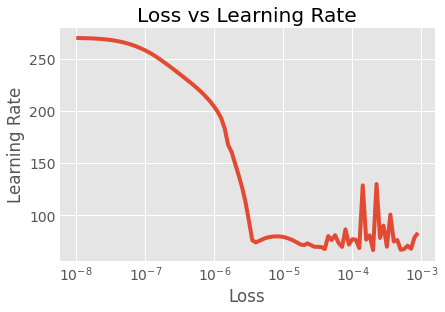

In [ ]:
plt.title("Loss vs Learning Rate")
plt.xlabel("Loss")
plt.ylabel("Learning Rate")
plt.semilogx(history.history["lr"],history.history["loss"])

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
model = tf.keras.models.Sequential([
      tf.keras.layers.Conv1D(filters=60,kernel_size=5,
                             strides=1,padding="causal",
                             activation="relu",
                             input_shape=[None,1]),
      tf.keras.layers.LSTM(256, return_sequences=True),
      tf.keras.layers.LSTM(128, return_sequences=True),
      tf.keras.layers.Dense(128, activation="relu"),
      tf.keras.layers.Dense(64, activation="relu"),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Lambda(lambda x: x*500)
])


optimizer = tf.keras.optimizers.SGD(lr=3e-7, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set,epochs=350)

Epoch 1/350
1/1 [==============================] - 0s 9ms/step - loss: 330.9964 - mae: 331.4964
Epoch 2/350
1/1 [==============================] - 0s 1ms/step - loss: 314.5647 - mae: 315.0647
Epoch 3/350
1/1 [==============================] - 0s 2ms/step - loss: 295.7276 - mae: 296.2276
Epoch 4/350
1/1 [==============================] - 0s 2ms/step - loss: 277.2318 - mae: 277.7318
Epoch 5/350
1/1 [==============================] - 0s 2ms/step - loss: 244.2988 - mae: 244.7988
Epoch 6/350
1/1 [==============================] - 0s 2ms/step - loss: 225.8818 - mae: 226.3818
Epoch 7/350
1/1 [==============================] - 0s 2ms/step - loss: 208.5272 - mae: 209.0272
Epoch 8/350
1/1 [==============================] - 0s 1ms/step - loss: 184.0183 - mae: 184.5183
Epoch 9/350
1/1 [==============================] - 0s 3ms/step - loss: 158.5795 - mae: 159.0795
Epoch 10/350
1/1 [==============================] - 0s 2ms/step - loss: 140.6378 - mae: 141.1376
Epoch 11/350
1/1 [=====================

In [ ]:
rnn_forecast = model_forecast(model, series[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1,-1,0]

In [ ]:
n = tf.keras.metrics.MeanAbsoluteError()
n.update_state(adj_valid, rnn_forecast)
print('Mean Absolute Error: ', n.result().numpy())
m = tf.keras.metrics.RootMeanSquaredError()
m.update_state(adj_valid, rnn_forecast)
print('Root Mean Squared Error: ', m.result().numpy())

Mean Absolute Error:  155.49394
Root Mean Squared Error:  172.85031


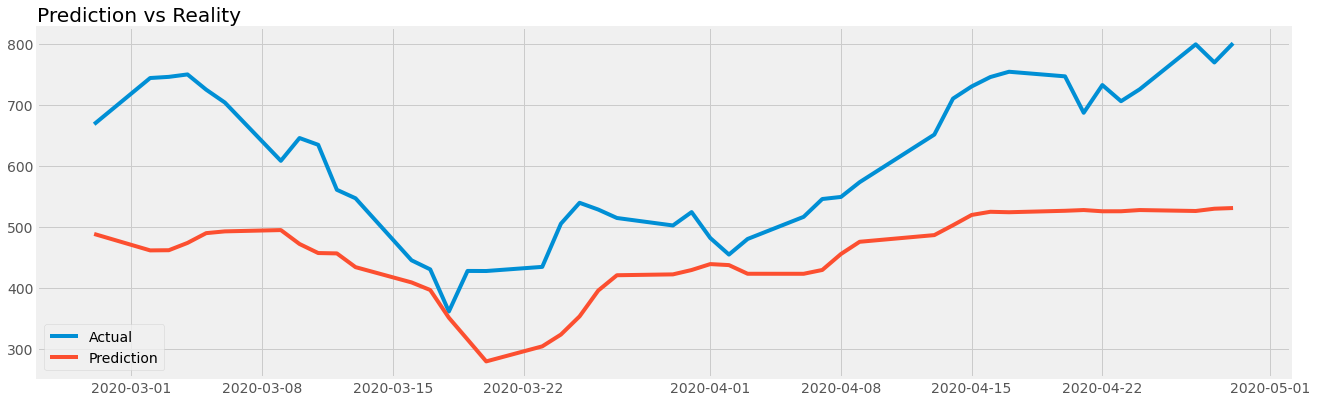

In [ ]:
plt.figure(figsize=(20,6))
plt.style.use("fivethirtyeight")
plt.title("Prediction vs Reality", loc="left")
plt.plot(dates_valid, adj_valid, label="Actual")
plt.plot(dates_valid, rnn_forecast, label = "Prediction")
plt.legend()